In [1]:
! pip install xlrd

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_name = "../data/museums.xlsx"
dfs = pd.read_excel(file_name, sheet_name="Monthly")

month_names = ["April","May","June","July","August","September","October","November","December","January","February","March"]
month_nums = [4,5,6,7,8,9,10,11,12,1,2,3]
ordered_month_names = [ month_names[ (i+9) % 12] for i in range(0,12) ]

years = [2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]


museum_names = []
museum_ids = []
current_museum = -1

# dict [ (musum id,year num,month num) ] = number of visitors
my_dict = {}

for (i,r) in dfs.iterrows():
    if i < 18:  # skip headers & total
        continue

    if r[1] == "2004/2005": # new museum
        current_museum += 1
        museum_names.append(r[0])
        museum_ids.append(current_museum)
        continue

    if r[0] in month_names:
        month_num = month_nums[ month_names.index(r[0]) ]

        for j in range(1, 17):
            year = j-1
            key = (current_museum, year, month_num)
            if not isinstance(r[j],int):
                 continue
            my_dict[key] = int(r[j])

In [4]:
i = 0
for m in museum_names:
    print(i,m)
    i += 1

0 BRITISH MUSEUM
1 GEFFRYE MUSEUM
2 HORNIMAN MUSEUM (Excluding visits to the Garden)
3 IMPERIAL WAR MUSEUM (IWM) TOTAL
4 (IWM) LONDON
5 (IWM) HMS BELFAST
6 (IWM) CHURCHILL WAR ROOMS 
7 (IWM) DUXFORD 
8 (IWM) NORTH
9 NATIONAL GALLERY
10 NATURAL HISTORY MUSEUM (NHM) TOTAL
11 (NHM) SOUTH KENSINGTON
12 (NHM) TRING
13 ROYAL MUSEUMS GREENWICH 
14 NATIONAL MUSEUMS LIVERPOOL
15 SCIENCE MUSEUM GROUP (SMG) TOTAL
16 (SMG) SOUTH KENSINGTON 
17 (SMG) NATIONAL MEDIA MUSEUM
18 (SMG) NATIONAL RAILWAY MUSEUM
19 (SMG) LOCOMOTION AT SHILDON
20 (SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER
21 NATIONAL COAL MINING MUSEUM FOR ENGLAND
22 (SMG) SWINDON (WROUGHTON)
23 NATIONAL PORTRAIT GALLERY
24 ROYAL ARMOURIES (RA) TOTAL
25 (RA) LEEDS
26 (RA) FORT NELSON 
27 (RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) 
28 SIR JOHN SOANE'S MUSEUM
29 TATE GALLERIES TOTAL
30 TATE BRITAIN 
31 TATE MODERN  
32 TATE LIVERPOOL
33 TATE ST IVES
34 VICTORIA AND ALBERT MUSUEM (V&A) TOTAL
35 (V&A) SOUTH KENSINGTON
36 (V&A) MUSEUM

In [5]:
museum_boroughs = dict.fromkeys(museum_names)
museum_boroughs

{'BRITISH MUSEUM': None,
 'GEFFRYE MUSEUM': None,
 'HORNIMAN MUSEUM (Excluding visits to the Garden)': None,
 'IMPERIAL WAR MUSEUM (IWM) TOTAL': None,
 '(IWM) LONDON': None,
 '(IWM) HMS BELFAST': None,
 '(IWM) CHURCHILL WAR ROOMS ': None,
 '(IWM) DUXFORD ': None,
 '(IWM) NORTH': None,
 'NATIONAL GALLERY': None,
 'NATURAL HISTORY MUSEUM (NHM) TOTAL': None,
 '(NHM) SOUTH KENSINGTON': None,
 '(NHM) TRING': None,
 'ROYAL MUSEUMS GREENWICH ': None,
 'NATIONAL MUSEUMS LIVERPOOL': None,
 'SCIENCE MUSEUM GROUP (SMG) TOTAL': None,
 '(SMG) SOUTH KENSINGTON ': None,
 '(SMG) NATIONAL MEDIA MUSEUM': None,
 '(SMG) NATIONAL RAILWAY MUSEUM': None,
 '(SMG) LOCOMOTION AT SHILDON': None,
 '(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER': None,
 'NATIONAL COAL MINING MUSEUM FOR ENGLAND': None,
 '(SMG) SWINDON (WROUGHTON)': None,
 'NATIONAL PORTRAIT GALLERY': None,
 'ROYAL ARMOURIES (RA) TOTAL': None,
 '(RA) LEEDS': None,
 '(RA) FORT NELSON ': None,
 '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ': No

In [6]:
museum_boroughs['BRITISH MUSEUM'] = 'Camden'

In [7]:
museum_boroughs['GEFFRYE MUSEUM'] = 'Hackney'

In [8]:
museum_boroughs['HORNIMAN MUSEUM (Excluding visits to the Garden)'] = 'Lewisham'

In [9]:
museum_boroughs['IMPERIAL WAR MUSEUM (IWM) TOTAL'] = 0

In [10]:
museum_boroughs['(IWM) LONDON'] = 'Southwark'

In [11]:
museum_boroughs['(IWM) HMS BELFAST'] = 'Southwark'

In [12]:
museum_boroughs['(IWM) CHURCHILL WAR ROOMS '] = 'Westminster'

In [13]:
museum_boroughs['(IWM) DUXFORD '] = 0

In [14]:
museum_boroughs['(IWM) NORTH'] = 0

In [15]:
museum_boroughs['NATIONAL GALLERY'] = 'Westminster'

In [16]:
museum_boroughs['NATURAL HISTORY MUSEUM (NHM) TOTAL'] = 0

In [17]:
museum_boroughs['(NHM) SOUTH KENSINGTON'] = 'Kensington and Chelsea'

In [18]:
museum_boroughs['(NHM) TRING'] = 0

In [19]:
museum_boroughs['ROYAL MUSEUMS GREENWICH '] = 'Greenwich'

In [20]:
museum_boroughs['NATIONAL MUSEUMS LIVERPOOL'] = 0

In [21]:
museum_boroughs['SCIENCE MUSEUM GROUP (SMG) TOTAL'] = 0

In [22]:
museum_boroughs['(SMG) SOUTH KENSINGTON '] = 'Kensington and Chelsea'

In [23]:
museum_boroughs['(SMG) NATIONAL MEDIA MUSEUM'] = 0

In [24]:
museum_boroughs['(SMG) NATIONAL RAILWAY MUSEUM'] = 0

In [25]:
museum_boroughs['(SMG) LOCOMOTION AT SHILDON'] = 0

In [26]:
museum_boroughs['(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER'] = 0

In [27]:
museum_boroughs['NATIONAL COAL MINING MUSEUM FOR ENGLAND'] = 0

In [28]:
museum_boroughs['(SMG) SWINDON (WROUGHTON)'] = 0

In [29]:
museum_boroughs['NATIONAL PORTRAIT GALLERY'] = 'Westminster'

In [30]:
museum_boroughs['ROYAL ARMOURIES (RA) TOTAL'] = 0

In [31]:
museum_boroughs['(RA) LEEDS'] = 0

In [32]:
museum_boroughs['(RA) FORT NELSON '] = 0

In [33]:
museum_boroughs['(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) '] = 'Tower Hamlets'

In [34]:
museum_boroughs["SIR JOHN SOANE'S MUSEUM"] = 'Camden'

In [35]:
museum_boroughs['TATE GALLERIES TOTAL'] = 0

In [36]:
museum_boroughs['TATE BRITAIN '] = 'Southwark'

In [37]:
museum_boroughs['TATE MODERN  '] = 'Southwark'

In [38]:
museum_boroughs['TATE LIVERPOOL'] = 0

In [39]:
museum_boroughs['TATE ST IVES'] = 0

In [40]:
museum_boroughs['VICTORIA AND ALBERT MUSUEM (V&A) TOTAL'] = 0

In [41]:
museum_boroughs['(V&A) SOUTH KENSINGTON'] = 'Kensington and Chelsea'

In [42]:
museum_boroughs['(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN'] = 'Tower Hamlets'

In [43]:
museum_boroughs['(V&A) THEATRE MUSEUM, COVENT GARDEN'] = 'Kensington and Chelsea'

In [44]:
museum_boroughs['(V&A) BLYTHE HOUSE'] = 'Hammersmith and Fulham'

In [45]:
museum_boroughs['WALLACE COLLECTION'] = 'Westminster'

In [46]:
museum_boroughs['MUSEUM OF LONDON'] = 'City of London'

In [47]:
museum_boroughs['MUSEUM IN DOCKLANDS'] = 'Tower Hamlets'

In [48]:
museum_boroughs

{'BRITISH MUSEUM': 'Camden',
 'GEFFRYE MUSEUM': 'Hackney',
 'HORNIMAN MUSEUM (Excluding visits to the Garden)': 'Lewisham',
 'IMPERIAL WAR MUSEUM (IWM) TOTAL': 0,
 '(IWM) LONDON': 'Southwark',
 '(IWM) HMS BELFAST': 'Southwark',
 '(IWM) CHURCHILL WAR ROOMS ': 'Westminster',
 '(IWM) DUXFORD ': 0,
 '(IWM) NORTH': 0,
 'NATIONAL GALLERY': 'Westminster',
 'NATURAL HISTORY MUSEUM (NHM) TOTAL': 0,
 '(NHM) SOUTH KENSINGTON': 'Kensington and Chelsea',
 '(NHM) TRING': 0,
 'ROYAL MUSEUMS GREENWICH ': 'Greenwich',
 'NATIONAL MUSEUMS LIVERPOOL': 0,
 'SCIENCE MUSEUM GROUP (SMG) TOTAL': 0,
 '(SMG) SOUTH KENSINGTON ': 'Kensington and Chelsea',
 '(SMG) NATIONAL MEDIA MUSEUM': 0,
 '(SMG) NATIONAL RAILWAY MUSEUM': 0,
 '(SMG) LOCOMOTION AT SHILDON': 0,
 '(SMG) MUSEUM OF SCIENCE AND INDUSTRY, MANCHESTER': 0,
 'NATIONAL COAL MINING MUSEUM FOR ENGLAND': 0,
 '(SMG) SWINDON (WROUGHTON)': 0,
 'NATIONAL PORTRAIT GALLERY': 'Westminster',
 'ROYAL ARMOURIES (RA) TOTAL': 0,
 '(RA) LEEDS': 0,
 '(RA) FORT NELSON ': 0,


In [49]:
keys_list = list(museum_boroughs.keys())

for key in keys_list:
    if museum_boroughs[key] in [0, None]:
        museum_boroughs.pop(key)
        
museum_boroughs

{'BRITISH MUSEUM': 'Camden',
 'GEFFRYE MUSEUM': 'Hackney',
 'HORNIMAN MUSEUM (Excluding visits to the Garden)': 'Lewisham',
 '(IWM) LONDON': 'Southwark',
 '(IWM) HMS BELFAST': 'Southwark',
 '(IWM) CHURCHILL WAR ROOMS ': 'Westminster',
 'NATIONAL GALLERY': 'Westminster',
 '(NHM) SOUTH KENSINGTON': 'Kensington and Chelsea',
 'ROYAL MUSEUMS GREENWICH ': 'Greenwich',
 '(SMG) SOUTH KENSINGTON ': 'Kensington and Chelsea',
 'NATIONAL PORTRAIT GALLERY': 'Westminster',
 '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ': 'Tower Hamlets',
 "SIR JOHN SOANE'S MUSEUM": 'Camden',
 'TATE BRITAIN ': 'Southwark',
 'TATE MODERN  ': 'Southwark',
 '(V&A) SOUTH KENSINGTON': 'Kensington and Chelsea',
 '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN': 'Tower Hamlets',
 '(V&A) THEATRE MUSEUM, COVENT GARDEN': 'Kensington and Chelsea',
 '(V&A) BLYTHE HOUSE': 'Hammersmith and Fulham',
 'WALLACE COLLECTION': 'Westminster',
 'MUSEUM OF LONDON': 'City of London',
 'MUSEUM IN DOCKLANDS': 'Tower Hamlets'}

In [50]:
museum_to_borough = {
    'BRITISH MUSEUM': 'Camden',
    'GEFFRYE MUSEUM': 'Hackney',
    'HORNIMAN MUSEUM (Excluding visits to the Garden)': 'Lewisham',
    '(IWM) LONDON': 'Southwark',
    '(IWM) HMS BELFAST': 'Southwark',
    '(IWM) CHURCHILL WAR ROOMS ': 'Westminster',
    'NATIONAL GALLERY': 'Westminster',
    '(NHM) SOUTH KENSINGTON': 'Kensington and Chelsea',
    'ROYAL MUSEUMS GREENWICH ': 'Greenwich',
    '(SMG) SOUTH KENSINGTON ': 'Kensington and Chelsea',
    'NATIONAL PORTRAIT GALLERY': 'Westminster',
    '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ': 'Tower Hamlets',
    "SIR JOHN SOANE'S MUSEUM": 'Camden',
    'TATE BRITAIN ': 'Southwark',
    'TATE MODERN  ': 'Southwark',
    '(V&A) SOUTH KENSINGTON': 'Kensington and Chelsea',
    '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN': 'Tower Hamlets',
    '(V&A) THEATRE MUSEUM, COVENT GARDEN': 'Kensington and Chelsea',
    '(V&A) BLYTHE HOUSE': 'Hammersmith and Fulham',
    'WALLACE COLLECTION': 'Westminster',
    'MUSEUM OF LONDON': 'City of London',
    'MUSEUM IN DOCKLANDS': 'Tower Hamlets'
}

In [51]:
set(museum_to_borough.values())

{'Camden',
 'City of London',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Kensington and Chelsea',
 'Lewisham',
 'Southwark',
 'Tower Hamlets',
 'Westminster'}

In [52]:
def reverse_dict(original):
    reverse = {}
    for key in original:
        value = original[key]
        if value in reverse:
            reverse[value].append(key)
        else:
            reverse[value] = [key]
    
    return reverse

In [53]:
borough_to_museums = reverse_dict(museum_to_borough)
borough_to_museums

{'Camden': ['BRITISH MUSEUM', "SIR JOHN SOANE'S MUSEUM"],
 'Hackney': ['GEFFRYE MUSEUM'],
 'Lewisham': ['HORNIMAN MUSEUM (Excluding visits to the Garden)'],
 'Southwark': ['(IWM) LONDON',
  '(IWM) HMS BELFAST',
  'TATE BRITAIN ',
  'TATE MODERN  '],
 'Westminster': ['(IWM) CHURCHILL WAR ROOMS ',
  'NATIONAL GALLERY',
  'NATIONAL PORTRAIT GALLERY',
  'WALLACE COLLECTION'],
 'Kensington and Chelsea': ['(NHM) SOUTH KENSINGTON',
  '(SMG) SOUTH KENSINGTON ',
  '(V&A) SOUTH KENSINGTON',
  '(V&A) THEATRE MUSEUM, COVENT GARDEN'],
 'Greenwich': ['ROYAL MUSEUMS GREENWICH '],
 'Tower Hamlets': ['(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ',
  '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN',
  'MUSEUM IN DOCKLANDS'],
 'Hammersmith and Fulham': ['(V&A) BLYTHE HOUSE'],
 'City of London': ['MUSEUM OF LONDON']}

In [54]:
# indx = 13

# to_plot_2012 = []
# to_plot_2011 = []
# to_plot_2013 = []
# for m in range(1,13):
#     k = (indx,8,m)
#     to_plot_2012.append(dict[k])
#     k = (indx,7,m)
#     to_plot_2011.append(dict[k])
#     k = (indx,9,m)
#     to_plot_2013.append(dict[k])


# plt.plot(range(1,13), to_plot_2012, label ="2012")
# plt.plot(range(1,13), to_plot_2011, label = "2011")
# plt.plot(range(1,13), to_plot_2013, label = "2013")
# plt.xticks(np.arange(1,13,1), ordered_month_names, rotation=90)
# plt.title("V&A Museum of Childhood visits by month and year")
# plt.legend()
# plt.show()

In [55]:
london_museum_names = list(museum_to_borough.keys())
london_museum_names

['BRITISH MUSEUM',
 'GEFFRYE MUSEUM',
 'HORNIMAN MUSEUM (Excluding visits to the Garden)',
 '(IWM) LONDON',
 '(IWM) HMS BELFAST',
 '(IWM) CHURCHILL WAR ROOMS ',
 'NATIONAL GALLERY',
 '(NHM) SOUTH KENSINGTON',
 'ROYAL MUSEUMS GREENWICH ',
 '(SMG) SOUTH KENSINGTON ',
 'NATIONAL PORTRAIT GALLERY',
 '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ',
 "SIR JOHN SOANE'S MUSEUM",
 'TATE BRITAIN ',
 'TATE MODERN  ',
 '(V&A) SOUTH KENSINGTON',
 '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN',
 '(V&A) THEATRE MUSEUM, COVENT GARDEN',
 '(V&A) BLYTHE HOUSE',
 'WALLACE COLLECTION',
 'MUSEUM OF LONDON',
 'MUSEUM IN DOCKLANDS']

In [56]:
my_dict

{(0, 0, 4): 403841,
 (0, 1, 4): 372676,
 (0, 2, 4): 431430,
 (0, 3, 4): 400735,
 (0, 4, 4): 455743,
 (0, 5, 4): 508408,
 (0, 6, 4): 513323,
 (0, 7, 4): 495739,
 (0, 8, 4): 579873,
 (0, 9, 4): 644605,
 (0, 10, 4): 641259,
 (0, 11, 4): 600774,
 (0, 12, 4): 530029,
 (0, 13, 4): 549563,
 (0, 14, 4): 472113,
 (0, 15, 4): 487262,
 (0, 0, 5): 367435,
 (0, 1, 5): 414362,
 (0, 2, 5): 443157,
 (0, 3, 5): 431701,
 (0, 4, 5): 454604,
 (0, 5, 5): 471666,
 (0, 6, 5): 539734,
 (0, 7, 5): 485629,
 (0, 8, 5): 462164,
 (0, 9, 5): 660497,
 (0, 10, 5): 654228,
 (0, 11, 5): 635393,
 (0, 12, 5): 568317,
 (0, 13, 5): 541927,
 (0, 14, 5): 480033,
 (0, 15, 5): 546823,
 (0, 0, 6): 352583,
 (0, 1, 6): 390743,
 (0, 2, 6): 442917,
 (0, 3, 6): 401792,
 (0, 4, 6): 389540,
 (0, 5, 6): 460450,
 (0, 6, 6): 461935,
 (0, 7, 6): 526789,
 (0, 8, 6): 457906,
 (0, 9, 6): 579950,
 (0, 10, 6): 596527,
 (0, 11, 6): 601099,
 (0, 12, 6): 567555,
 (0, 13, 6): 557991,
 (0, 14, 6): 507173,
 (0, 15, 6): 577624,
 (0, 0, 7): 504251,
 (

In [57]:
museum_to_id = {}

for museum in london_museum_names:
    museum_to_id[museum] = museum_names.index(museum)

museum_to_id

{'BRITISH MUSEUM': 0,
 'GEFFRYE MUSEUM': 1,
 'HORNIMAN MUSEUM (Excluding visits to the Garden)': 2,
 '(IWM) LONDON': 4,
 '(IWM) HMS BELFAST': 5,
 '(IWM) CHURCHILL WAR ROOMS ': 6,
 'NATIONAL GALLERY': 9,
 '(NHM) SOUTH KENSINGTON': 11,
 'ROYAL MUSEUMS GREENWICH ': 13,
 '(SMG) SOUTH KENSINGTON ': 16,
 'NATIONAL PORTRAIT GALLERY': 23,
 '(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ': 27,
 "SIR JOHN SOANE'S MUSEUM": 28,
 'TATE BRITAIN ': 30,
 'TATE MODERN  ': 31,
 '(V&A) SOUTH KENSINGTON': 35,
 '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN': 36,
 '(V&A) THEATRE MUSEUM, COVENT GARDEN': 37,
 '(V&A) BLYTHE HOUSE': 38,
 'WALLACE COLLECTION': 39,
 'MUSEUM OF LONDON': 55,
 'MUSEUM IN DOCKLANDS': 56}

In [58]:
id_to_museum = reverse_dict(museum_to_id)
id_to_museum

{0: ['BRITISH MUSEUM'],
 1: ['GEFFRYE MUSEUM'],
 2: ['HORNIMAN MUSEUM (Excluding visits to the Garden)'],
 4: ['(IWM) LONDON'],
 5: ['(IWM) HMS BELFAST'],
 6: ['(IWM) CHURCHILL WAR ROOMS '],
 9: ['NATIONAL GALLERY'],
 11: ['(NHM) SOUTH KENSINGTON'],
 13: ['ROYAL MUSEUMS GREENWICH '],
 16: ['(SMG) SOUTH KENSINGTON '],
 23: ['NATIONAL PORTRAIT GALLERY'],
 27: ['(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) '],
 28: ["SIR JOHN SOANE'S MUSEUM"],
 30: ['TATE BRITAIN '],
 31: ['TATE MODERN  '],
 35: ['(V&A) SOUTH KENSINGTON'],
 36: ['(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN'],
 37: ['(V&A) THEATRE MUSEUM, COVENT GARDEN'],
 38: ['(V&A) BLYTHE HOUSE'],
 39: ['WALLACE COLLECTION'],
 55: ['MUSEUM OF LONDON'],
 56: ['MUSEUM IN DOCKLANDS']}

In [59]:
year_to_id = {year: (year-2004) for year in range(2004, 2020)}
year_to_id

{2004: 0,
 2005: 1,
 2006: 2,
 2007: 3,
 2008: 4,
 2009: 5,
 2010: 6,
 2011: 7,
 2012: 8,
 2013: 9,
 2014: 10,
 2015: 11,
 2016: 12,
 2017: 13,
 2018: 14,
 2019: 15}

In [60]:
interesting_years = np.arange(2005, 2016)
interesting_years

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [62]:
museum_to_year_to_visits ={}


for borough in borough_to_museums:
    orderded_london_museum_names = borough_to_museums[borough]

    for museum in orderded_london_museum_names:
        museum_to_year_to_visits[museum] = {}

        mus_id = museum_to_id[museum]

        for year in interesting_years:
            year_id = year_to_id[year]

            try:
                total_visits = my_dict.get((mus_id, year_id, 7), None) + \
                               my_dict.get((mus_id, year_id, 8), None) + \
                               my_dict.get((mus_id, year_id, 9), None)
            except TypeError:
                total_visits = -1

            museum_to_year_to_visits[museum][year] = total_visits


museum_to_year_to_visits_df = pd.DataFrame(museum_to_year_to_visits).T
museum_to_year_to_visits_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
BRITISH MUSEUM,1080649,1321648,1453219,1577837,1533597,1631020,1725097,1417113,2043374,1899933,2003979
SIR JOHN SOANE'S MUSEUM,0,0,0,25886,28239,29393,28990,25252,31830,31640,32424
GEFFRYE MUSEUM,14836,14272,16155,18416,19583,24594,25844,22828,25640,25837,26189
HORNIMAN MUSEUM (Excluding visits to the Garden),84083,137457,149125,142735,199905,183445,146409,171835,194287,225358,218412
(IWM) LONDON,138435,190345,186183,203304,230689,332025,279530,234645,181413,497889,295110
(IWM) HMS BELFAST,55075,78594,75173,73960,81725,76342,84399,68759,106655,112444,97481
TATE BRITAIN,248552,368895,334187,367645,329034,425999,381530,308011,454445,332563,353331
TATE MODERN,1027906,1378397,1302914,1226854,1300543,1355168,1300961,1612365,1181869,1727405,1242115
(IWM) CHURCHILL WAR ROOMS,77006,84907,87421,82297,96358,106000,115217,88338,152314,151150,158781
NATIONAL GALLERY,877000,1135000,1018000,1243000,1252000,1432000,1398000,1139000,1542000,1643000,1341136


In [63]:
(museum_to_year_to_visits_df == -1).sum(axis=0)

2005    0
2006    0
2007    0
2008    0
2009    2
2010    1
2011    0
2012    0
2013    0
2014    0
2015    0
dtype: int64

In [64]:
(museum_to_year_to_visits_df == -1).sum(axis=1)

BRITISH MUSEUM                                      0
SIR JOHN SOANE'S MUSEUM                             0
GEFFRYE MUSEUM                                      0
HORNIMAN MUSEUM (Excluding visits to the Garden)    0
(IWM) LONDON                                        0
(IWM) HMS BELFAST                                   0
TATE BRITAIN                                        0
TATE MODERN                                         0
(IWM) CHURCHILL WAR ROOMS                           0
NATIONAL GALLERY                                    0
NATIONAL PORTRAIT GALLERY                           0
WALLACE COLLECTION                                  2
(NHM) SOUTH KENSINGTON                              0
(SMG) SOUTH KENSINGTON                              1
(V&A) SOUTH KENSINGTON                              0
(V&A) THEATRE MUSEUM, COVENT GARDEN                 0
ROYAL MUSEUMS GREENWICH                             0
(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON)     0
(V&A) MUSEUM OF CHILDHOOD, B

In [65]:
museum_to_year_to_visits_df.replace({0: None, -1: None}, inplace=True)

In [67]:
borough_to_museums

{'Camden': ['BRITISH MUSEUM', "SIR JOHN SOANE'S MUSEUM"],
 'Hackney': ['GEFFRYE MUSEUM'],
 'Lewisham': ['HORNIMAN MUSEUM (Excluding visits to the Garden)'],
 'Southwark': ['(IWM) LONDON',
  '(IWM) HMS BELFAST',
  'TATE BRITAIN ',
  'TATE MODERN  '],
 'Westminster': ['(IWM) CHURCHILL WAR ROOMS ',
  'NATIONAL GALLERY',
  'NATIONAL PORTRAIT GALLERY',
  'WALLACE COLLECTION'],
 'Kensington and Chelsea': ['(NHM) SOUTH KENSINGTON',
  '(SMG) SOUTH KENSINGTON ',
  '(V&A) SOUTH KENSINGTON',
  '(V&A) THEATRE MUSEUM, COVENT GARDEN'],
 'Greenwich': ['ROYAL MUSEUMS GREENWICH '],
 'Tower Hamlets': ['(RA) WHITE TOWER (BASED AT THE TOWER OF LONDON) ',
  '(V&A) MUSEUM OF CHILDHOOD, BETHNAL GREEN',
  'MUSEUM IN DOCKLANDS'],
 'Hammersmith and Fulham': ['(V&A) BLYTHE HOUSE'],
 'City of London': ['MUSEUM OF LONDON']}

In [66]:
# pd.set_option('display.float_format', lambda x: '%.0f' % x)
museum_to_year_to_visits_df

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
BRITISH MUSEUM,1080649.0,1321648.0,1453219.0,1577837.0,1533597.0,1631020.0,1725097.0,1417113.0,2043374.0,1899933.0,2003979.0
SIR JOHN SOANE'S MUSEUM,NaN,NaN,NaN,25886.0,28239.0,29393.0,28990.0,25252.0,31830.0,31640.0,32424.0
GEFFRYE MUSEUM,14836.0,14272.0,16155.0,18416.0,19583.0,24594.0,25844.0,22828.0,25640.0,25837.0,26189.0
HORNIMAN MUSEUM (Excluding visits to the Garden),84083.0,137457.0,149125.0,142735.0,199905.0,183445.0,146409.0,171835.0,194287.0,225358.0,218412.0
(IWM) LONDON,138435.0,190345.0,186183.0,203304.0,230689.0,332025.0,279530.0,234645.0,181413.0,497889.0,295110.0
(IWM) HMS BELFAST,55075.0,78594.0,75173.0,73960.0,81725.0,76342.0,84399.0,68759.0,106655.0,112444.0,97481.0
TATE BRITAIN,248552.0,368895.0,334187.0,367645.0,329034.0,425999.0,381530.0,308011.0,454445.0,332563.0,353331.0
TATE MODERN,1027906.0,1378397.0,1302914.0,1226854.0,1300543.0,1355168.0,1300961.0,1612365.0,1181869.0,1727405.0,1242115.0
(IWM) CHURCHILL WAR ROOMS,77006.0,84907.0,87421.0,82297.0,96358.0,106000.0,115217.0,88338.0,152314.0,151150.0,158781.0
NATIONAL GALLERY,877000.0,1135000.0,1018000.0,1243000.0,1252000.0,1432000.0,1398000.0,1139000.0,1542000.0,1643000.0,1341136.0


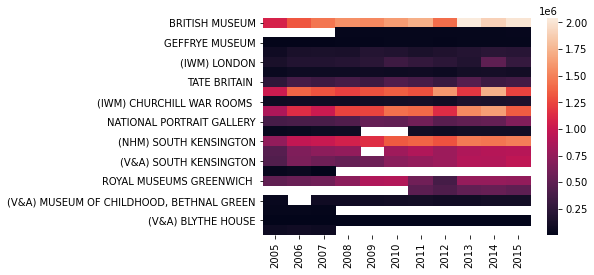

In [70]:
ax = sns.heatmap(museum_to_year_to_visits_df)

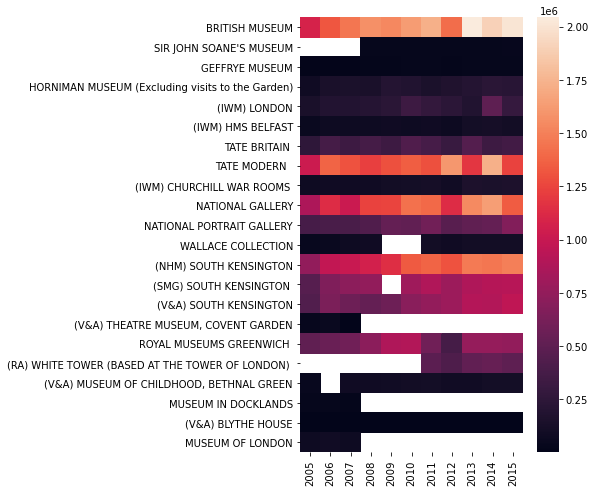

In [74]:
f, ax = plt.subplots(figsize=(5, 8))
ax = sns.heatmap(museum_to_year_to_visits_df, square=False)